## 1. Grad-CAM:


"GRADient-weighted Class Activation Mapping" (Grad-CAM) - Uses gradients of the classification's final concept (dog) to produce a map highlighting the important regions in the image to predict the concept. Works with multiple CNN architectures (VGG, ResNet-based) to enhance "image classification, image captioning, and visual question answering models. 

Methodology: VGG-16 and AlexNet were used to evaluate GradCAM against previous techniques. Human study involved 43 Amazon Turk workers to determine whether GradCAM was able to depict a category in the image. 

Results: "Guided Grad-CAM peroms the best among all methods" (5.1evaluating class discrimination)
Models generalize better (5.2 Evaluating Trust)
GradCAM is more faithful - ability to accurately represent the true decision/reasoning process learned by the model. 


Cons: Cant highlight fine grained details (pixel space gradient visualizations). 

## 2. ResNet:


Uses skip connections between 3 encoder and 3 decoder blocks. Followed by a classifier with softmax to estimate probability maps for each class. 7x7 convolutional layers are "unpooled" via an unpooling layer. Upsamples dimensions of the input feature map, leftover locations filled with 0s. Upooling does not require fiddling around with pool layer parameters like I did with LeNet in HW5.

Methodology: F-CNN called SD-NET utilizing this architecture was compared to two other approaches. 

Results: Overall faster than other approaches while also consistently increasing scores/accuracies.  

Cons: Severe class imbalance problem

## 3. LeNet:

Methodology: Investigate depths, normals, and semantic labeling since each uses different target data defininig tasks and loss functions. 

Results: A convenient new baseline CNN for these 3 categories due to its simplicity and speed. Comparable if not better than more complex and slower algorithms. More accurately defines an image towards ground truth RGB input values, providing better predictions of shape than other models. 

Cons: Overfitting

## 4. ImageNet:

Methodology: ImageNet dataset used on less complex residual nets up to 152 layers. Inspired by VGG, convolutional layers are 3x3 filters where amount of filters are preserved, even though it has less than VGG. Requires a 224x224 crop, might be horizontally flipped, per pixel mean subtracted, and color augmentation as image preprocessing.

Results: 34 layer resnet performed better than 18-layer resnet, specifically on training error and is more generalized to validation data over the training data. 18 Layer resnet "converges faster" at the early stage of optimization. 

Cons: While it aims to utilize more numerous, less complex nets: it is vulnerable to overfitting and requires a significant dataset. 

## 5. Adam

A method "optimizer". Features adaptive learning rates based off data. 

methodology: LeNet variations were trained where learning rates were altered on scheduled passes. 

Results: Other methods struggle with overtraining leading to lower training error but increasing minimum test error. Adam did not experience this issue due to learning rate being kept relatively high. Randomly oscillations stabilizes the error rate so that it does not rebound back in the opposite direction. 

Cons: Cannot converge to an optimal solution within a reasonable time. 

## 6. Transfer Learning

Takes as input color images of size 221x221 since it uses convolutional layers of 96 to 1024 kernels for 3x3 to 7x7 filters and pooling layers with 3x3 and 5x5 kernels. Has become a significant candidate in visual recognition tasks via CNNs. 

Methodology: Spatial search: Items of interest appear in different locations and scales in test images compared to training images. Multiple sub patches are extracted of different sizes at different locations. Great for manipulating what to "learn/unlearn" as specific data is transferred. 

Results: Specificallyed optimized CNN representations for different tasks to achieve superior results. 

Cons: Requires initial and target problems to be conditionally met or similar. 

## FIXES I HAD TO MAKE TO HW6:

1. I am on a windows machine. In order to get cell 3 to compile, I had to change the directory strings from: 

        data_dir = "/data/HAM10000"

        metadata = pd.read_csv(data_dir + '/HAM100000_metadata.csv')

    to:

        data_dir =  "data\\HAM10000"

        metadata = pd.read_csv(data_dir + '\\HAM10000_metadata.csv')

    I also had to do this for the next cell, "visualize some examples":
    
        im_sample = data_dir + "/" + labl.values[0] + f'/{ID}.jpg'
        
    to:
    
        im_sample = data_dir + "\\" + labl.values[0] + f'\\{ID}.jpg'
        
    and for augmenting the data:
    
        data_dir = "data/HAM10000"
        
    to:
    
        data_dir = "data\\HAM10000"
        

2. StratifiedSampler's __init__ function was defined only with 2 positional arguements: 

        class StratifiedSampler(Sampler):
        """Stratified Sampling
        Provides equal representation of target classes
        """
        def __init__(self, class_vector):
    
    but the method called utilized test_size, making the parameter count 3. So i just added test size as a parameter to __init__:
    
         def __init__(self, class_vector, test_size):
            """
            Arguments
            ---------
            class_vector : torch tensor
                a vector of class labels
            batch_size : integer
                batch_size
            """
            self.n_splits = 1
            self.class_vector = class_vector
            self.test_size = test_size
            
and now we get:

Train Data Size: 6409

Test Data Size: 2003

Validation Data Size: 1603

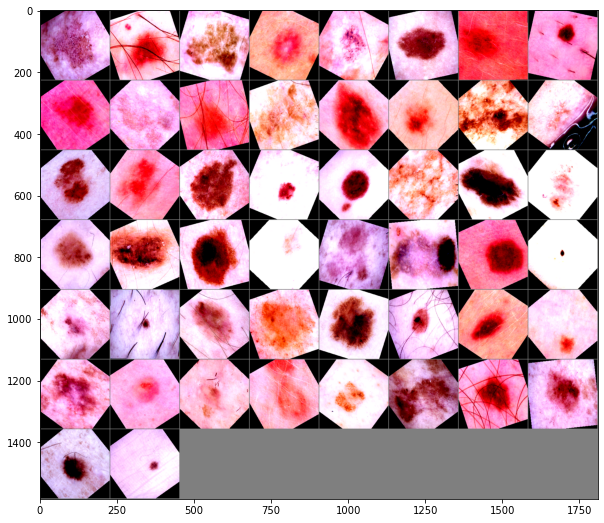

Oh thats a wide variety of transformations for image preprocessing I wanted to look into but couldnt figure out how to implement. 

    transform_train = transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(degrees=60),
                        transforms.ToTensor(),
                        transforms.Normalize(norm_mean, norm_std),
                        ])

I also didnt want to run the code without progress updates. So i included: 

    from tqdm.notebook import tqdm, trange
    import time 
    
And then changed the for loop condition:

    for i, data in enumerate(tqdm(train_data_loader)):
    
as tqdm is a progress bar for each iteration. 

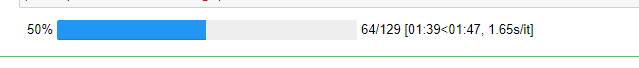

His model has higher all around accuracies for each class. 

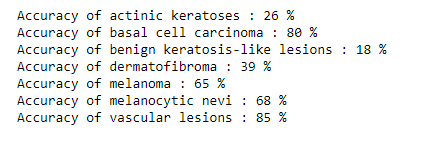


Mine on the other hand, ranged from

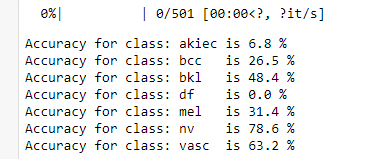